# **California's Covid-19 Data Analysis**


Analysis of Covid-19 data is very important since this is a matter of healthcare.  Healthecare should always be given a first preference. The whole world suffered a lot form this Corona Virus attack, this include commercial, business, transport and many more sectors. Hence analysis of Covid data my help in finding the solutions to reduce the possibility of increasing Covid cases in upcoming days.





In this project I am extracting Covid data for California from the New York Time (NYT) Covid data. I am doing analysis on this data to find some hidden patterns in the dataset by creating some visualizations of the data.

In [7]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import datetime
from datetime import date, datetime
import numpy as np
import requests
from io import BytesIO
from PIL import Image
from IPython.core.pylabtools import figsize
import matplotlib.image as mpimg
from PIL import Image, ImageFilter

**Import Dataset**

I am importing dataset from "https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-counties.csv". The primary data contains daily cumulative number of cases and deaths reported in each county and state across the U.S. since the beginning of the pandemic. More information about data can be found in https://github.com/nytimes/covid-19-data.

In [8]:
def geoid2code(geoid):
    return int(geoid[4:])

nyt_github_covid_rolling_avg = 'https://raw.githubusercontent.com/nytimes/covid-19-data/master/rolling-averages/us-counties.csv'

df = pd.read_csv(nyt_github_covid_rolling_avg,converters=dict(geoid=geoid2code))
df.rename(columns={'geoid': 'GEOID'},inplace=True)

start, end = datetime.fromisoformat(df['date'].min()),\
               datetime.fromisoformat(df['date'].max())

In [9]:
# Let's have a look at the dataset
df.head()

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
0,2020-01-21,53061,Snohomish,Washington,1,0.14,0.02,0,0.0,0.0
1,2020-01-22,53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
2,2020-01-23,53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
3,2020-01-24,53061,Snohomish,Washington,0,0.14,0.02,0,0.0,0.0
4,2020-01-24,17031,Cook,Illinois,1,0.14,0.00,0,0.0,0.0


**Covid data analysis for Califorinia**

Here I am only interested in analysing California's data for this project. Hence I am extracting the data for california. 

In [10]:
# df_cal contains the covid data for California
df_cal = df[df["state"] == "California"]
df_cal.head()

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
7,2020-01-25,6059,Orange,California,1,0.14,0.0,0,0.0,0.0
10,2020-01-26,6059,Orange,California,0,0.14,0.0,0,0.0,0.0
11,2020-01-26,6037,Los Angeles,California,1,0.14,0.0,0,0.0,0.0
15,2020-01-27,6059,Orange,California,0,0.14,0.0,0,0.0,0.0
16,2020-01-27,6037,Los Angeles,California,0,0.14,0.0,0,0.0,0.0


In [11]:
df_cal.shape # dimension of the data

(33040, 10)

This dataset contains 33040 obdervations and with 10 variables. The quantitative variables are date, cases, cases_avg, cases_avg_per_100k, deaths, deaths_avg and deaths_avg_per_100k. Qualitative variables are GEOID, county, and state. 
The variables details are as followes.



```
date - Date 
GEOID - Containg the different ID's for each counties
county - County Name
state - State to which the county belongs to.
cases - Number of cases recorded for the given date.
cases_avg - Avarage cases for the given data for a county.
cases_avg_per_100k - Average cases per 100k.
deaths - Total deaths recorded on the day in a county.
deaths_avg - Avarage deaths for the given data for a county.
deaths_avg_per_100k - Average Deaths per 100k.
```

**Statistics of the feature variables**

The code below computes some statistics of the California's data.

In [12]:
# Compute the statistics of the data containg mean, standerd deviation, 
df_cal.describe()

,GEOID,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k
count,33040.000000,33040.000000,33040.000000,32568.000000,33040.000000,33040.000000,32568.000000
mean,6071.551392,144.193341,142.247963,19.170863,2.092403,2.086755,0.236609
std,116.482076,706.249163,646.006085,27.402293,12.947805,9.565022,0.438848
min,6001.000000,-1157.000000,0.000000,0.000000,-423.000000,0.000000,0.000000
25%,6029.000000,0.000000,2.860000,3.270000,0.000000,0.000000,0.000000
50%,6059.000000,12.000000,18.535000,8.900000,0.000000,0.140000,0.070000
75%,6087.000000,74.000000,80.570000,23.900000,1.000000,1.000000,0.280000
max,6999.000000,33081.000000,18234.000000,366.950000,930.000000,241.290000,6.850000


Here we can observe that we have some negative numbers for deaths and cases. Cases and deaths should be positive intergers, there can not be negative values for these two. However it is hard to understand the reason for some data to be negative. Hence for the purpose of this project I am keeping these values as it is. 

The standerd deviation for cases (706.23) is quite high as compared to deaths(12.94). The avarage value of cases is also quite high as compared to deaths.

Here the statistics for GEOID should not be considered as it is qualitaive variable.

**Total cases in each county for the given period.**

Creating a pivot table of cases and county. Total number of cases from 2020-01-25 to 2021-09-29 added up for each county to make a plot that compares Covid cases of each county. 

In [13]:
# Pivot Table
df_1 = df_cal.pivot_table("cases", "county", aggfunc=sum)
df_1.head()

,cases
county,
Alameda,117676
Alpine,101
Amador,5102
Butte,22149
Calaveras,3580


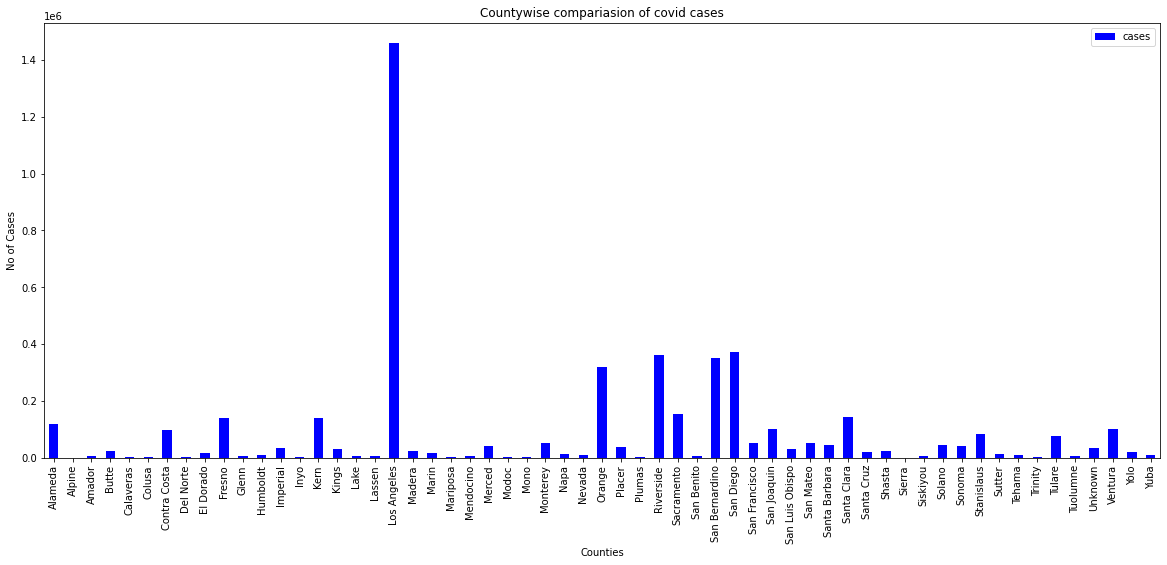

In [14]:
# bar plot to show the number of cases countywise. 
df_1.plot(kind = 'bar', figsize = (20,8), color="blue")

# X-axis and Y-axis labeling 
plt.title('Countywise compariasion of covid cases')
plt.xlabel('Counties')
plt.ylabel('No of Cases')
plt.show()

The Los Angeles has the highest number of covid cases as compared to other counties in the California. From the above bar graph it can be seen that the top 6 counties in the California to have highsest overal covid cases are Los Angeles, San Diego, Riverside, San Bernardino, Orange and Sacramento. Hence I am doing some time series analysis on these counties. 

In [15]:
df_2 = (df_1.sort_values(by='cases', ascending=False)).head(6)
df_2

,cases
county,
Los Angeles,1458381
San Diego,372208
Riverside,362691
San Bernardino,350976
Orange,318676
Sacramento,153240


In [16]:
# Create a numpy array to store the county name along with the state it belongs to.
counties = np.array([[('Los Angeles','California'),('San Diego','California'),('Riverside','California')],
                      [('San Bernardino','California'),('Orange','California'),('Sacramento','California')]])

# Create a numpy array to store colors name
colors = np.array([['darkblue','orange','grey'],
                       ['red','blue', 'green']])  

# Defining a function that take counties, color, data column as arguments. 
def plot_counties_data (counties,color=colors,figsize=(13,13), data_col='cases_avg'):
    
    rows,cols,atts = counties.shape
    #Create a common plot
    fig, axes = plt.subplots(rows,cols,sharey=True,figsize=figsize)
    if axes.ndim == 1:
        # make sure this is a 2D array
        axes = axes[np.newaxis,:]
    # Creating a loop for all six counties to make the plots.
    for r in range(rows):
        for c in range(cols):
            cty,state = counties[r,c]
            this_df = df_cal[(df_cal['county']== cty) & (df_cal['state']==state)]
            times = np.array([date.fromisoformat(d) for d in this_df.date])

            plt.axes(axes[r,c])
            l, = plt.plot(times,this_df[data_col], label=cty)
            # Assign color of the plot.
            l.set_color(colors[r,c])
            plt.xticks(rotation=65)
            plt.legend()

Time series alayisis of number cases in six counties. 

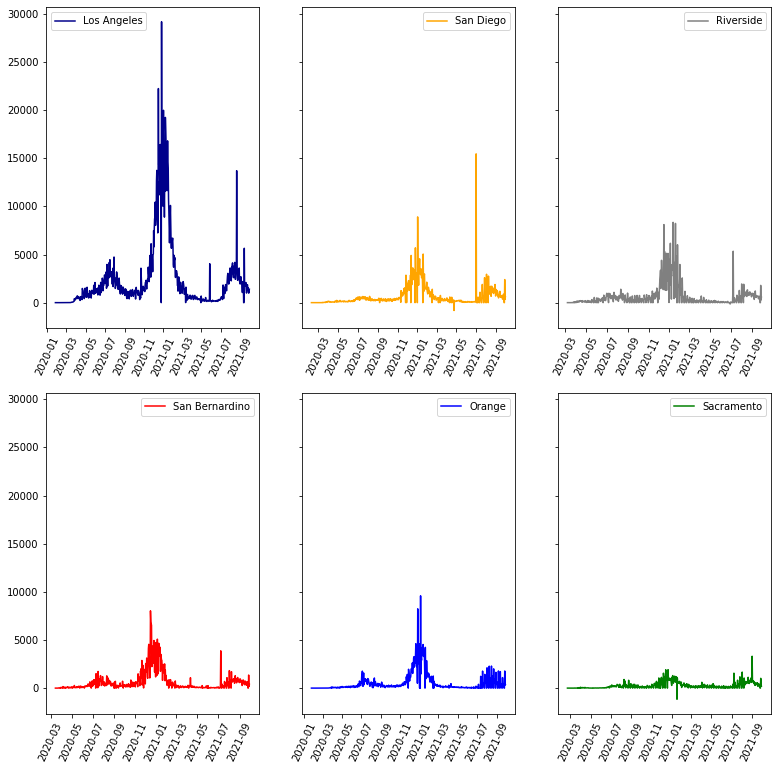

In [17]:
plot_counties_data(counties, data_col='cases')

It can be seen that number of cases from Dec 2020 to Feb 2021 were highest for Los Angeles, Reverside, San Bernandino, and Orenge Counties. As contrast to these counties, number of cases were highest in the month July for San Diego. 

Time series alayisis of daily average cases per 100k in six counties.

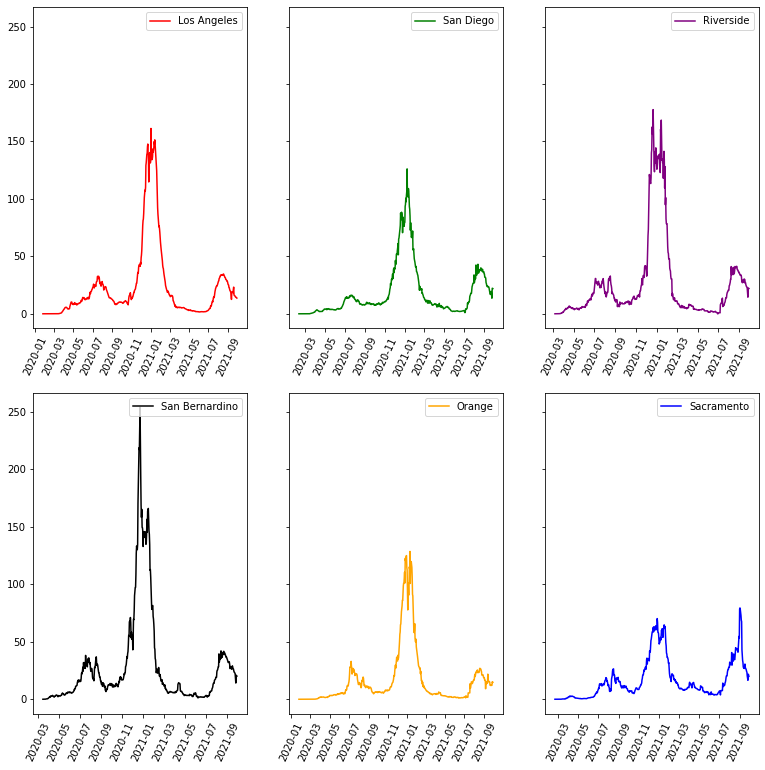

In [18]:
# Change the colors.
colors = np.array([['red','green','purple'],
                       ['black','orange', 'blue']])

# Calling the function plot_counties_data for cases_avg_per_100k
plot_counties_data(counties,data_col='cases_avg_per_100k')

In these plots it can be seen that San Bernardino showed the highest number of average cases per 100k, while Riverside showed 2nd highest. The top two states Los Angeles and San Diego shows less avarage cases per 100k. 

Time series alayisis of daily average deaths in six counties.

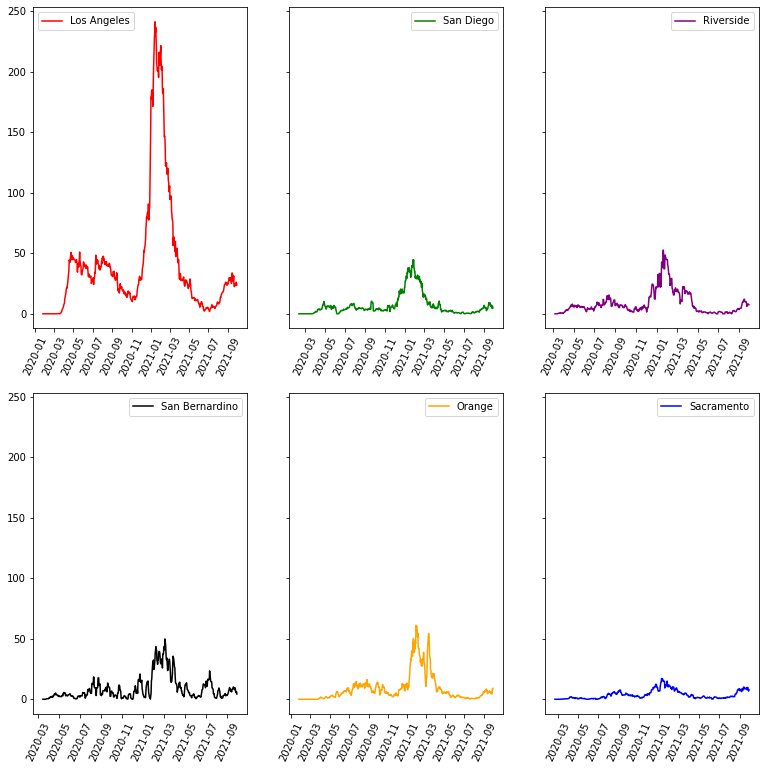

In [19]:
# Change the colors
colors = np.array([['red','green','purple'],
                       ['black','orange', 'blue']])

plot_counties_data(counties,data_col='deaths_avg')

The avearge deaths for Los Angeles were too high as compared to other counties from the period Nov 2020 to April 2021. Surprisingly San Diego being second top county in number of cases, the avearge deaths are not too high as compared to Riverside and Orange counties. 

**Mortality Rates**

For each couties for the given period, mortality rate can be calculated as number of deaths devided by number of cases.

In [20]:
# Creating new pivote table of county, cases and deaths.
df_3 = df_cal.pivot_table(values = ["cases", "deaths"], index = "county", aggfunc = sum)
# Mortality Rates
df_3["mortality_rate"] = (df_3['deaths']/df_3['cases'])*100
df_3.style.background_gradient()

,cases,deaths,mortality_rate
county,,,
Alameda,117676,1334,1.133621
Alpine,101,0,0.000000
Amador,5102,61,1.195610
Butte,22149,241,1.088085
Calaveras,3580,72,2.011173
Colusa,2951,18,0.609963
Contra Costa,97109,929,0.956657
Del Norte,3582,39,1.088777
El Dorado,16346,133,0.813655


The table above shows the mortality rate is highest for Inyo and Imperial counties. The Los Angeles being county with highest number of cases shows less mortality rate as compared to Inyo and Imperial. Some of the counties show zero mortality rate. The bar plot below shows the comparison of the same.

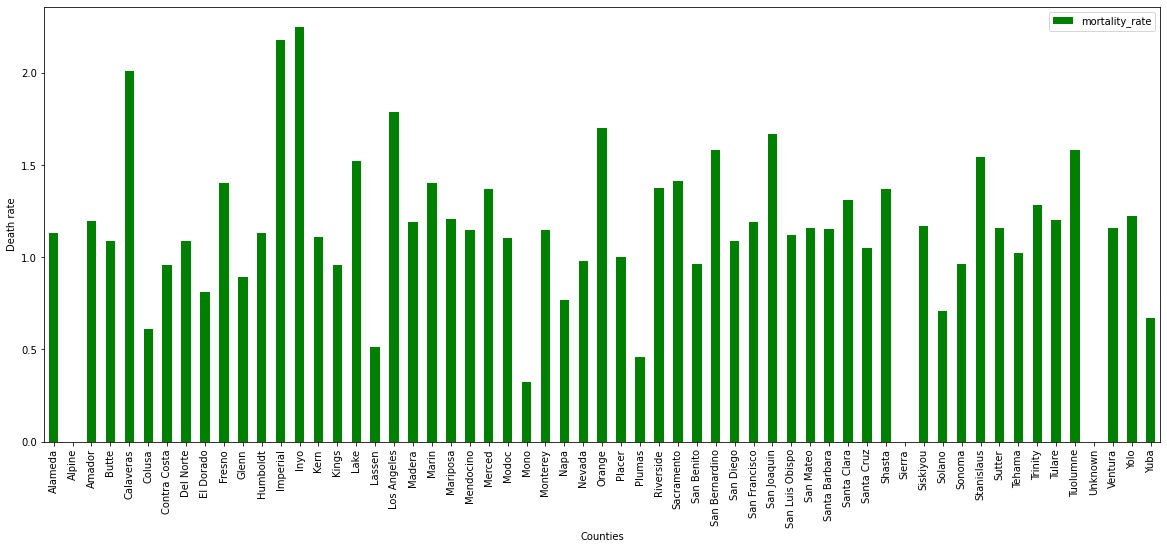

In [21]:
# Plot of mortality rates countywise
df_3.plot(y="mortality_rate", kind = 'bar', figsize = (20,8), color= "green")

# X-axis and Y-axis labeling 
plt.xlabel('Counties')
plt.ylabel('Death rate')
plt.show()

**Time Series Analysis**

I have done some time series analysis to find out overall trends in the covid data with regards to time.

In [22]:
# Converting Date to Y-m-d format
df_cal["date"] = pd.to_datetime(df_cal["date"], format = "%Y-%m-%d")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


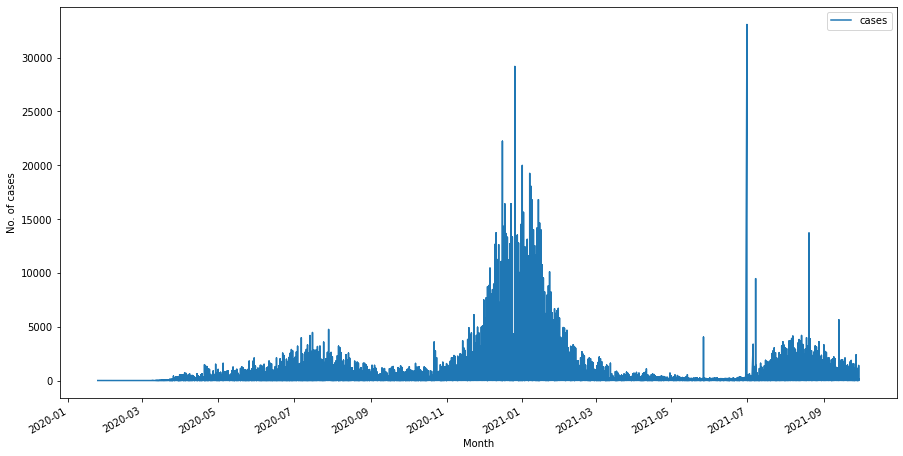

In [23]:
# Subset of df_cal containing date, county, cases and deaths columns
df_4 = df_cal[["date", "county", "cases", "deaths"]]
# Removing some negative values.
df_4a = df_4[df_4["cases"] >= 0]

# Line plot to show the overall trends in California's Covid cases from 2020-01 to 2021-09
df_4a.plot(x= "date", y="cases", figsize = (15,8), kind="line")
plt.xlabel('Month')
plt.ylabel('No. of cases')
plt.show()

From the above plot we could find a sudden jump during 2020-12 to 2021-03 and 2021-07 to 2021-09. Covid cases were high during these periods. We could see a suuden hike in the month of July 2021 in california which reached over 33000.

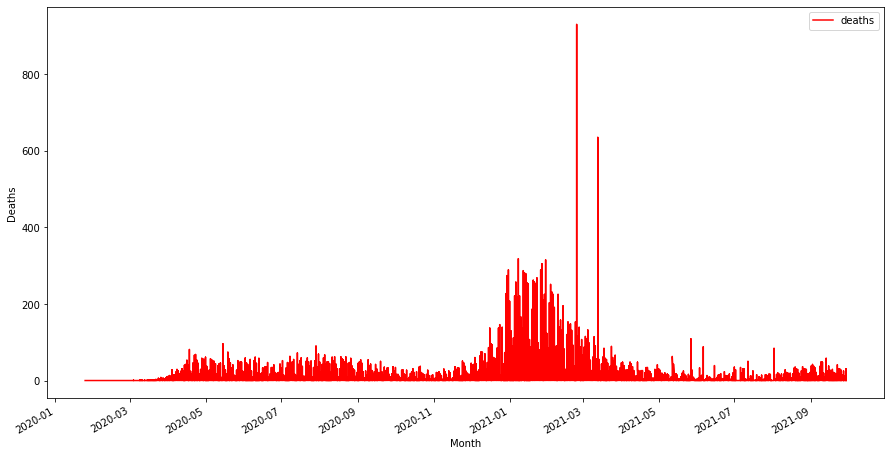

In [24]:
# Removing some negative values from the deaths column.
df_5 = df_4[df_4["deaths"] >= 0]

# Line plot to show the overall trends in California's deaths due to Covid from 2020-01 to 2021-09
df_5.plot(x= "date", y="deaths", figsize = (15,8), kind="line", color = "red")
plt.xlabel('Month')
plt.ylabel('Deaths')
plt.show()

The plot above shows the deaths due to covid for period 2020-01 to 2021-09 in California. As the cases were high during 2020-12 to 2021-03, the deaths were also high during the same time. In the last week of Feb 2021 deaths were reached to around 1000. 

**Plot to show the comparison between total cases and deaths in the counties of California.**

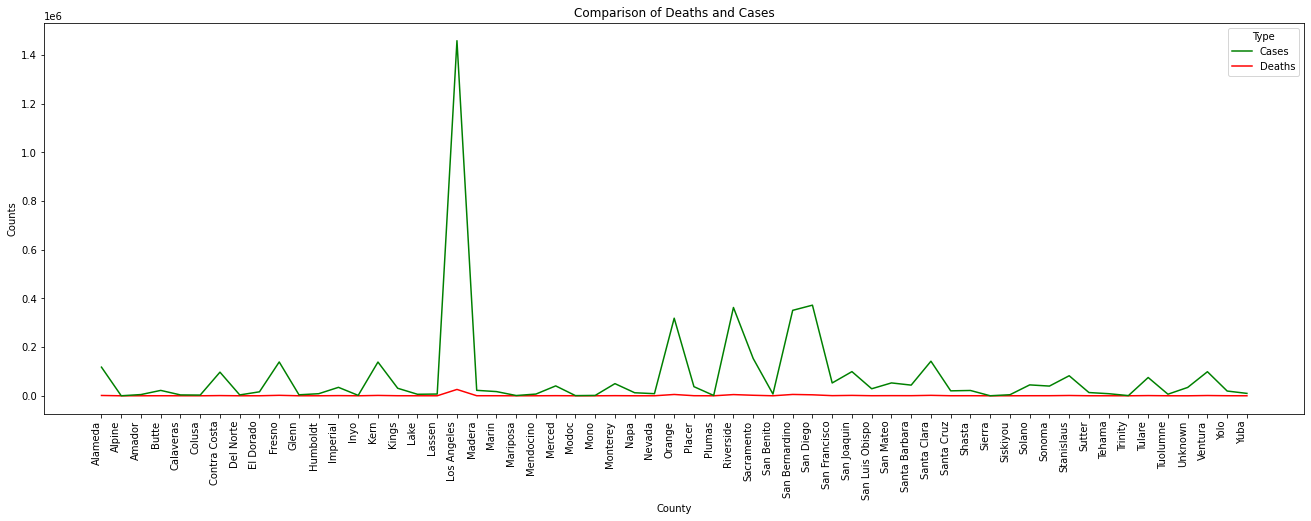

In [25]:
# Setting of plot 
fig = plt.figure(1,figsize=(25, 7))
ax1 = fig.add_subplot(111)
fig.subplots_adjust(top=0.9,left=0.2)
ax1.set_ylabel('Counts')
ax1.set_xlabel('County')

# assinging x and y axis values
(p1,) = ax1.plot(df_3.index, df_3.deaths, color='red', label='Deaths')
(p2,) = ax1.plot(df_3.index, df_3.cases, color='green', label='Cases')
ax1.set_title('Comparison of Deaths and Cases')

# Labeling   
ax1.legend((p2,p1),('Cases','Deaths'), loc='upper right', title='Type')
plt.setp(ax1.get_xticklabels(), rotation=90, ha='right')
plt.show()

The plot above shows the comaprison of the deaths vs cases in the counties of California. I found that the deaths show a flat line as compared to cases, a little jump in Los Angeles as the cases were high there. We could say that the rate of people recovered from Covid is higher than the death rate. 

**Geographic Visualizations of California's Covid Data**

Since our dataset do not contain latitude and longitude values for counties of California, I have taken a census dataset to get the values of latitude and longitude for the counties of california. Both the dataset contain GEOID as a common variable. We can merge the datasets by GEOID. We can find the census dataset from https://www2.census.gov/geo/docs/maps-data/data/gazetteer/2021_Gazetteer/2021_Gaz_counties_national.zip   

In [26]:
#Normally you'd get this data heree from a compressed file.
true_url = 'https://www2.census.gov/geo/docs/maps-data/data/gazetteer/2021_Gazetteer/2021_Gaz_counties_national.zip'

# To simplify things Prof. Gawron copied it here, uncompressed.
url = 'https://gawron.sdsu.edu/python_for_ss/course_core/book_draft/_static/2021_Gaz_counties_national.txt'

codes = pd.read_csv(url,sep='\t')

# last column name misparsed, many spaces added.  data cleanup
long = codes.columns[-1]
codes.rename(columns={long: long.strip()},inplace=True)

# Subtable of only GEOID, Latitude and Longitude
geoid_lat_long = codes[['GEOID','INTPTLAT','INTPTLONG']]
geoid_lat_long.head()

,GEOID,INTPTLAT,INTPTLONG
0,1001,32.532237,-86.646440
1,1003,30.659218,-87.746067
2,1005,31.870253,-85.405104
3,1007,33.015893,-87.127148
4,1009,33.977358,-86.566440


In [27]:
# Now I merge the two datasets (df_cal and geoid_lat_long) on GEOID
df_6 = pd.merge(df_cal, geoid_lat_long, how="left", on="GEOID")
# How the dataset looks now
df_6.head()

,date,GEOID,county,state,cases,cases_avg,cases_avg_per_100k,deaths,deaths_avg,deaths_avg_per_100k,INTPTLAT,INTPTLONG
0,2020-01-25,6059,Orange,California,1,0.14,0.0,0,0.0,0.0,33.675687,-117.777207
1,2020-01-26,6059,Orange,California,0,0.14,0.0,0,0.0,0.0,33.675687,-117.777207
2,2020-01-26,6037,Los Angeles,California,1,0.14,0.0,0,0.0,0.0,34.196398,-118.261862
3,2020-01-27,6059,Orange,California,0,0.14,0.0,0,0.0,0.0,33.675687,-117.777207
4,2020-01-27,6037,Los Angeles,California,0,0.14,0.0,0,0.0,0.0,34.196398,-118.261862


In [28]:
# Finding the dimension of the new dataset.
df_6.shape

(33040, 12)

Now the dataset is ready for geographic visualizations. I have uploaded a base map of California, taken from Wikimedia Commons, to my github repository. Now I am using the same base map in my analysis. 

I defined a function which can be called to plot various values on the basemap.

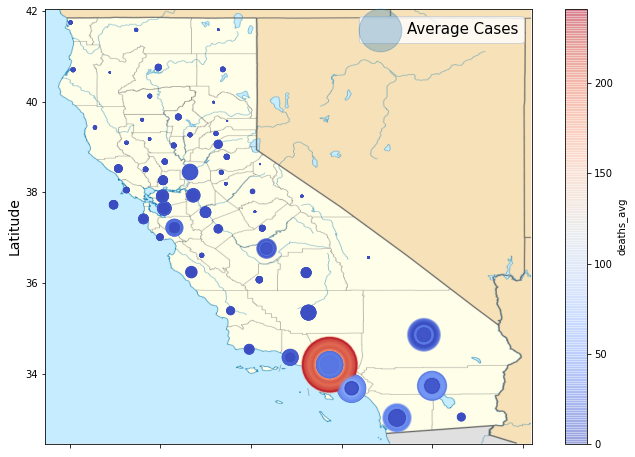

In [29]:
# Base Map URL
url_base_map = 'https://raw.githubusercontent.com/Umadevi65B/Umadevi65B.github.io/main/california_map.png'
# Read image.
response = requests.get(url_base_map)
california_img = Image.open(BytesIO(response.content))

# Defining a function which can be used for the various quantitative variable 
def geo_analisis(data, size_var=df_6["cases"], color_var='deaths', size_lable="cases", col_map=plt.get_cmap('Set1')):
    # c is the attribute we'll map onto colors, s is the attribute we'll represent with circle size.
    ax = df_6.plot(kind="scatter", x="INTPTLONG", y="INTPTLAT", figsize=(12,8),
                        s=size_var, label=size_lable,
                        c=color_var, cmap=col_map,
                        colorbar=True, alpha=0.3)
    plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=1)
    plt.ylabel("Latitude", fontsize=14)
    plt.xlabel("Longitude", fontsize=14)

    plt.legend(fontsize=15)
    plt.show()

# a map to show covid-19 average across the counties of California.
geo_analisis(df_6, df_6["cases_avg"]/5, 'deaths_avg', "Average Cases", plt.get_cmap('coolwarm'))

Above map shows the average cases and average deaths of covide in California. Bigger the size of bubble higher the number of cases and blue being very less deaths or no deaths and red colur indicates more deaths. Here I have divided average cases by 5 to make map clearly visible. 

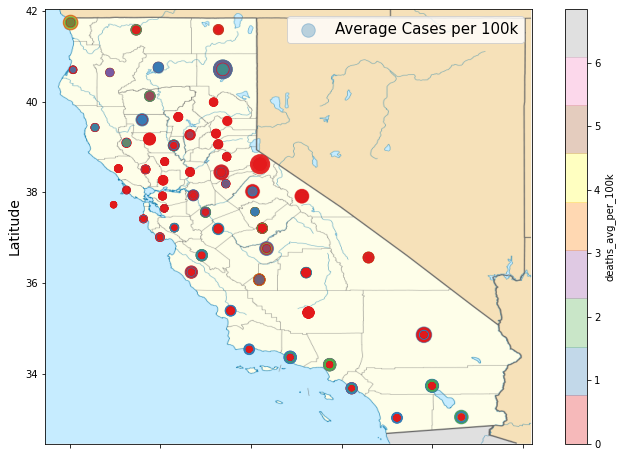

In [30]:
geo_analisis(df_6, df_6.cases_avg_per_100k, "deaths_avg_per_100k", "Average Cases per 100k")

Similar to the previous graph this graph shows the average cases per 100k and average deaths per 100k. Lassen county here is showing more deaths average per 100k and Apline is showing more average cases per 100k. The upper counties is comparitively showing more deaths average per 100k. 

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


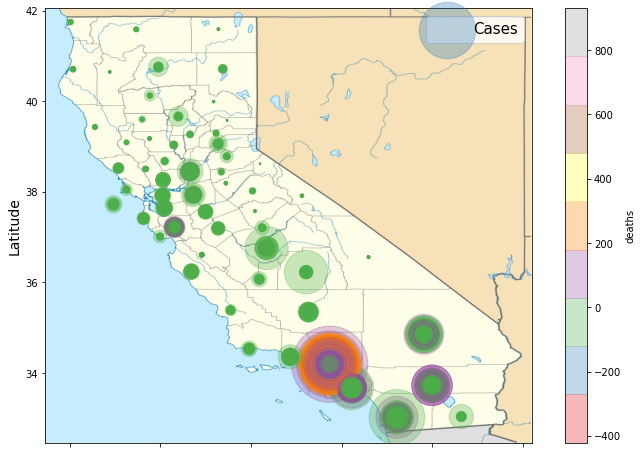

In [31]:
geo_analisis(df_6, df_6.cases/5, "deaths", "Cases")

This graph shows the trends of covid cases and deaths in california in the form of bubble. As explained above Los Angeles has the higher cases and deaths. 

**Montly Data Anlalysis of California's Covid Data**

Now let us consider five months during which the Covid cases were high. 

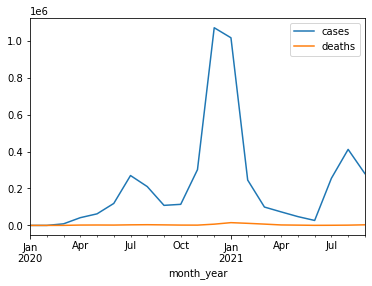

In [32]:
# Now let's add a month-year column to data frame which is need for further analysis.
df_7 = df_6
df_7["month_year"] = pd.to_datetime(df_7['date']).dt.to_period('M')

# Pivot table of columns cases and deaths with month-year as index. 
df_8 = df_7.pivot_table(values = ["cases", "deaths"], index = "month_year", aggfunc = sum)

# Pivot table plot
df_8.plot()
plt.show()

From the above graph we can find during 2020-12, 2021-01, 2021-02, 2021-07, and 2021-09 covid cases were quite high. Hence taking these five months for further analysis.

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


<Figure size 680x480 with 0 Axes>

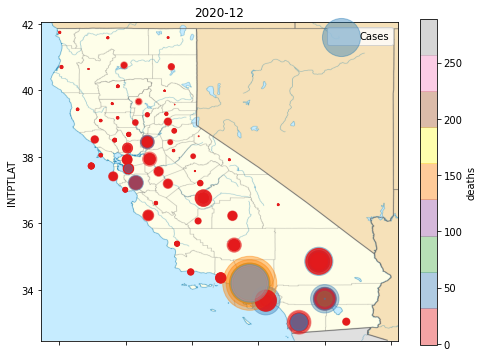

<Figure size 680x480 with 0 Axes>

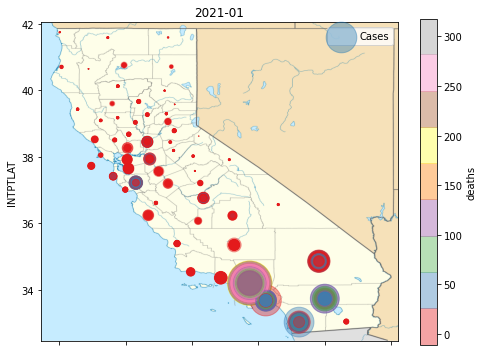

<Figure size 680x480 with 0 Axes>

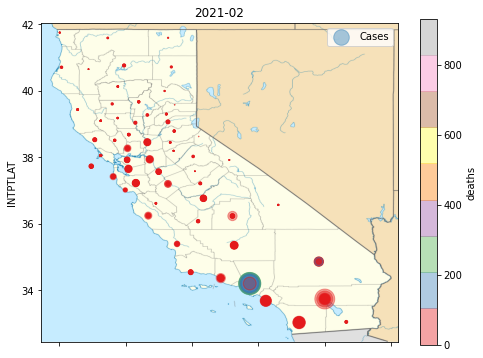

<Figure size 680x480 with 0 Axes>

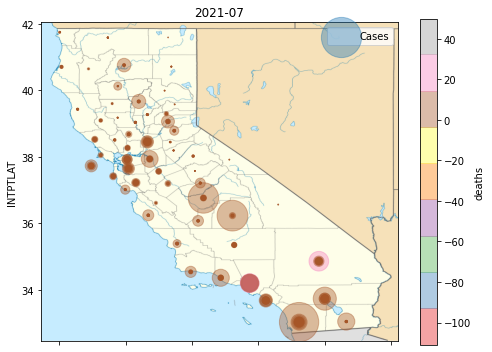

<Figure size 680x480 with 0 Axes>

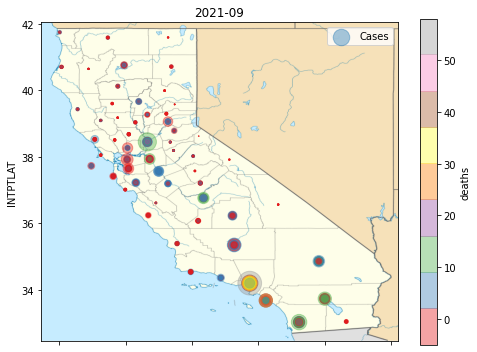

In [33]:
months_list = ["2020-12", "2021-01", "2021-02", "2021-07", "2021-09"]

# image resolution
dpi=96

# For each year:
for i in months_list:
 
    # Turn interactive plotting off
    plt.ioff()

    # initialize a figure
    fig = plt.figure(figsize=(680/dpi, 480/dpi), dpi=dpi)
    
    # Find the subset of the dataset for the perticular month
    subsetData = df_7[df_7.month_year == i]

    # Build the scatterplot
    subsetData.plot(kind="scatter", figsize=(8,6), x="INTPTLONG", y="INTPTLAT", 
                    s=subsetData.cases/10, label="Cases",
                    c="deaths", cmap=plt.get_cmap('Set1'),
                    colorbar=True, alpha=0.4)
    
    plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=1)
    plt.title(i)
    plt.show()


These map shows the trends of covid cases and deaths during the months Dec 2020, Jan 2021, Feb 2021, July 2021 and Sep 2021. December is showing more number of cases and deaths. Though the death rate in July is less, number of cases were high some counties. Sep 2021 is showing pretty less cases.

Here I have created an animiantion of figures using imgflip.com obtained from the following code. These figurs are showing monthly covid cases and deaths trends on the map of California. This animation shows the overall trends of covid cases and deaths from 2020-01 to 2021-09. 

```
for i in df_7.month_year.unique():[link text](https://)
 
    # Turn interactive plotting off
    plt.ioff()

    # initialize a figure
    fig = plt.figure(figsize=(680/dpi, 480/dpi), dpi=dpi)
    
    # Find the subset of the dataset for the current year
    subsetData = df_7[df_7.month_year == i]

    # Build the scatterplot
    subsetData.plot(kind="scatter", figsize=(8,6),
        x="INTPTLONG", 
        y="INTPTLAT", 
        s=subsetData.cases/10, label="Cases",
        c="deaths", cmap=plt.get_cmap('Set1'),
        colorbar=True, alpha=0.4)
    
    plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=1)
    filename='covid_enimation'+str(i)+'.png'
    plt.title(i)
    plt.savefig(fname=filename, dpi=96)
    plt.gca()
```



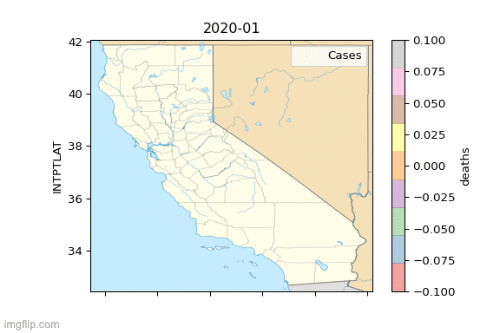

# **Conclusion**

From the above analysis we can conclude that, Los Angeles being the county with highest number of cases and deaths due to Covid-19 in California during 2020-01 to 2021-09. San Dieo, Riverside, Orange were the next counties with more number of cases. However the mortality rate is found to be highest in Inyo and Imperial counties. The number of cases and deaths were highest during the months Dec 2020 and Jan 2021.

Hence in further analysis, we need to find the reasons for the these high values in only some perticular counties or perticular months. Population may be one of the reason for this. It is very important to find out the reasons and find the possible solutions for these, since this is a case of health. These type of data analysis can provide a better insights about the data and helps us to find the better solutions. 

** End of the Analysis **